In [ ]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

[Learn the Basics](intro.html) \|\|
[Quickstart](quickstart_tutorial.html) \|\|
[Tensors](tensorqs_tutorial.html) \|\| **Datasets & DataLoaders** \|\|
[Transforms](transforms_tutorial.html) \|\| [Build
Model](buildmodel_tutorial.html) \|\|
[Autograd](autogradqs_tutorial.html) \|\|
[Optimization](optimization_tutorial.html) \|\| [Save & Load
Model](saveloadrun_tutorial.html)

Datasets & DataLoaders
======================


Code for processing data samples can get messy and hard to maintain; we
ideally want our dataset code to be decoupled from our model training
code for better readability and modularity. PyTorch provides two data
primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset`
that allow you to use pre-loaded datasets as well as your own data.
`Dataset` stores the samples and their corresponding labels, and
`DataLoader` wraps an iterable around the `Dataset` to enable easy
access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such
as FashionMNIST) that subclass `torch.utils.data.Dataset` and implement
functions specific to the particular data. They can be used to prototype
and benchmark your model. You can find them here: [Image
Datasets](https://pytorch.org/vision/stable/datasets.html), [Text
Datasets](https://pytorch.org/text/stable/datasets.html), and [Audio
Datasets](https://pytorch.org/audio/stable/datasets.html)

---

데이터 샘플을 처리하는 코드는 복잡해지고 유지 관리가 어려울 수 있습니다. 따라서 우리는 가독성과 모듈성을 위해 데이터셋 코드를 모델 학습 코드와 분리하는 것이 이상적입니다. PyTorch는 미리 로드된 데이터셋과 사용자 정의 데이터를 사용할 수 있도록 `torch.utils.data.DataLoader`와 `torch.utils.data.Dataset`이라는 두 가지 데이터 원시 구조를 제공합니다. `Dataset`은 샘플과 해당 레이블을 저장하고, `DataLoader`는 샘플에 쉽게 접근할 수 있도록 `Dataset` 주위에 반복 가능한 구조를 감쌉니다.

PyTorch 도메인 라이브러리는 `torch.utils.data.Dataset`를 서브클래스화하고 특정 데이터에 맞는 함수를 구현한 여러 미리 로드된 데이터셋(예: FashionMNIST)을 제공합니다. 이러한 데이터셋은 모델을 프로토타입하거나 벤치마크하는 데 사용할 수 있습니다. 관련 링크는 다음과 같습니다: [이미지 데이터셋](https://pytorch.org/vision/stable/datasets.html), [텍스트 데이터셋](https://pytorch.org/text/stable/datasets.html), [오디오 데이터셋](https://pytorch.org/audio/stable/datasets.html).

---

Loading a Dataset
=================

Here is an example of how to load the
[Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/)
dataset from TorchVision. Fashion-MNIST is a dataset of Zalando's
article images consisting of 60,000 training examples and 10,000 test
examples. Each example comprises a 28×28 grayscale image and an
associated label from one of 10 classes.

We load the [FashionMNIST Dataset](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) with the following parameters:

:   -   `root` is the path where the train/test data is stored,
    -   `train` specifies training or test dataset,
    -   `download=True` downloads the data from the internet if it\'s
        not available at `root`.
    -   `transform` and `target_transform` specify the feature and label
        transformations

---

데이터셋 로딩
=================

다음은 TorchVision에서 [Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) 데이터셋을 로드하는 예입니다. Fashion-MNIST는 60,000개의 훈련 샘플과 10,000개의 테스트 샘플로 구성된 Zalando의 상품 이미지 데이터셋입니다. 각 샘플은 28×28 크기의 그레이스케일 이미지와 10개 클래스 중 하나에 해당하는 레이블로 구성됩니다.

다음 매개변수를 사용하여 [FashionMNIST 데이터셋](https://pytorch.org/vision/stable/datasets.html#fashion-mnist)을 로드합니다:

- `root`: 훈련/테스트 데이터가 저장될 경로입니다.
- `train`: 훈련 데이터셋 또는 테스트 데이터셋을 지정합니다.
- `download=True`: `root`에 데이터가 없으면 인터넷에서 데이터를 다운로드합니다.
- `transform` 및 `target_transform`: 특성과 레이블 변환을 지정합니다.

---

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = "data", # 데이터가 저장될 경로
    train = True, # 훈련 데이터셋 또는 테스트 데이터셋을 지정
    download = True, # root 경로에 데이터가 없으면 인터넷에서 데이터를 다운로드
    transform = ToTensor() # 특성과 레이블 변환을 지정(여기선 Tensor로)
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False, # 훈련 데이터셋 또는 테스트 데이터셋을 지정(False라면 테스트)
    download = True, 
    transform = ToTensor() 
)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Iterating and Visualizing the Dataset
=====================================

We can index `Datasets` manually like a list: `training_data[index]`. We
use `matplotlib` to visualize some samples in our training data.

---

데이터셋 반복 및 시각화
=====================================

`Datasets`는 리스트처럼 수동으로 인덱싱할 수 있습니다: `training_data[index]`. `matplotlib`을 사용하여 훈련 데이터의 일부 샘플을 시각화할 수 있습니다.

---


In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

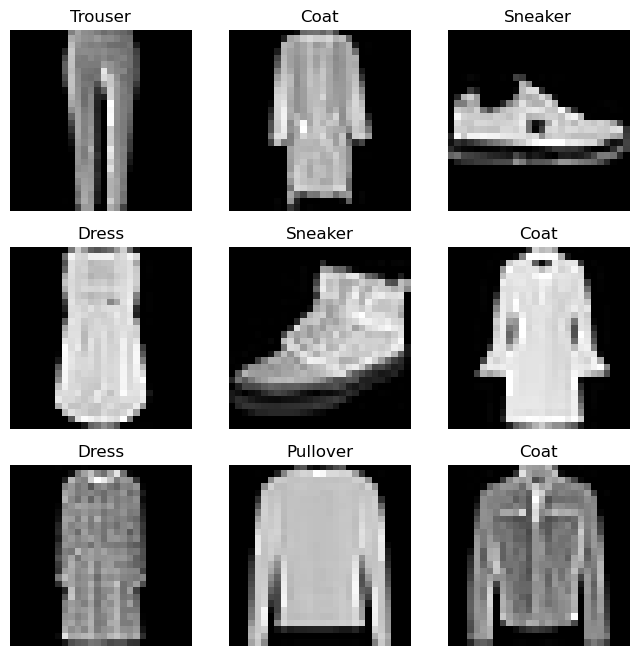

In [8]:
# 레이블을 클래스 이름에 매핑하는 딕셔너리
# 클래스를 모르면 데이터 확인 필요
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# 8x8 크기의 figure 생성
figure = plt.figure(figsize=(8, 8))

# 열과 행의 수를 3으로 설정
cols, rows = 3, 3

# 1부터 cols * rows (9)까지 반복
for i in range(1, cols * rows + 1):
    # training_data에서 랜덤한 인덱스를 선택
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    # 선택한 인덱스에 해당하는 이미지와 레이블을 가져옴
    img, label = training_data[sample_idx]
    # figure에 subplot을 추가
    figure.add_subplot(rows, cols, i)
    # subplot의 제목을 레이블의 이름으로 설정
    plt.title(labels_map[label])
    # 축을 표시하지 않음
    plt.axis("off")
    # 이미지를 그레이스케일로 표시
    plt.imshow(img.squeeze(), cmap="gray")

# figure를 화면에 표시
plt.show()


------------------------------------------------------------------------


Creating a Custom Dataset for your files
========================================

A custom Dataset class must implement three functions:
[\_\_init\_\_]{.title-ref}, [\_\_len\_\_]{.title-ref}, and
[\_\_getitem\_\_]{.title-ref}. Take a look at this implementation; the
FashionMNIST images are stored in a directory `img_dir`, and their
labels are stored separately in a CSV file `annotations_file`.

In the next sections, we\'ll break down what\'s happening in each of
these functions.

---

사용자 정의 데이터셋 생성
========================================

사용자 정의 데이터셋 클래스는 세 가지 함수를 구현해야 합니다: [\_\_init\_\_]{.title-ref}, [\_\_len\_\_]{.title-ref}, 그리고 [\_\_getitem\_\_]{.title-ref}. 다음 구현을 살펴보세요; FashionMNIST 이미지는 `img_dir` 디렉토리에 저장되고, 그들의 레이블은 별도의 CSV 파일 `annotations_file`에 저장됩니다.

다음 섹션에서는 각 함수에서 일어나는 일을 자세히 설명하겠습니다.

---

In [9]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

`__init__`
==========

The \_\_[init]() function is run once when instantiating the Dataset
object. We initialize the directory containing the images, the
annotations file, and both transforms (covered in more detail in the
next section).

The labels.csv file looks like: :

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9

---

`__init__`
==========

\_\_init\_\_() 함수는 데이터셋 객체를 인스턴스화할 때 한 번 실행됩니다. 우리는 이미지를 포함하는 디렉토리, 주석 파일, 그리고 변환을 초기화합니다 (변환에 대해서는 다음 섹션에서 더 자세히 다룹니다).

labels.csv 파일은 다음과 같습니다:

```
tshirt1.jpg, 0
tshirt2.jpg, 0
......
ankleboot999.jpg, 9
```

---

In [10]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

`__len__`
=========

The \_\_[len]() function returns the number of samples in our dataset.

Example:

---

`__len__`
=========

\_\_len\_\_() 함수는 데이터셋의 샘플 수를 반환합니다.

예시:

---

In [11]:
def __len__(self):
    return len(self.img_labels)

`__getitem__`
=============

The \_\_[getitem]() function loads and returns a sample from the dataset
at the given index `idx`. Based on the index, it identifies the image\'s
location on disk, converts that to a tensor using `read_image`,
retrieves the corresponding label from the csv data in
`self.img_labels`, calls the transform functions on them (if
applicable), and returns the tensor image and corresponding label in a
tuple.

---

`__getitem__`
=============

\_\_getitem\_\_() 함수는 주어진 인덱스 `idx`에서 데이터셋의 샘플을 로드하고 반환합니다. 인덱스를 기반으로 이미지의 디스크 위치를 확인하고, `read_image`를 사용하여 이를 텐서로 변환합니다. `self.img_labels`에 있는 CSV 데이터에서 해당 레이블을 가져오고, (적용 가능한 경우) 변환 함수를 호출하여 텐서 이미지와 해당 레이블을 튜플로 반환합니다.

---

In [12]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

------------------------------------------------------------------------


Preparing your data for training with DataLoaders
=================================================

The `Dataset` retrieves our dataset\'s features and labels one sample at
a time. While training a model, we typically want to pass samples in
\"minibatches\", reshuffle the data at every epoch to reduce model
overfitting, and use Python\'s `multiprocessing` to speed up data
retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an
easy API.

---

DataLoaders를 사용한 학습 데이터 준비
=================================================

`Dataset`은 데이터셋의 특성과 레이블을 한 번에 하나씩 가져옵니다. 모델을 학습할 때, 일반적으로 샘플을 "미니배치"로 전달하고, 모델 과적합을 줄이기 위해 각 에포크마다 데이터를 재셔플하며, Python의 `multiprocessing`을 사용하여 데이터 검색 속도를 높이고자 합니다.

`DataLoader`는 이러한 복잡성을 쉽게 처리할 수 있는 API를 제공하는 반복자입니다.

---

In [13]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Iterate through the DataLoader
==============================

We have loaded that dataset into the `DataLoader` and can iterate
through the dataset as needed. Each iteration below returns a batch of
`train_features` and `train_labels` (containing `batch_size=64` features
and labels respectively). Because we specified `shuffle=True`, after we
iterate over all batches the data is shuffled (for finer-grained control
over the data loading order, take a look at
[Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)).

---

DataLoader를 통한 반복
==============================

데이터셋을 `DataLoader`에 로드했으며, 필요에 따라 데이터셋을 반복할 수 있습니다. 아래의 각 반복은 `train_features`와 `train_labels`의 배치를 반환합니다 (`batch_size=64`개의 특성과 레이블을 각각 포함). `shuffle=True`를 지정했기 때문에 모든 배치를 반복한 후에는 데이터가 셔플됩니다 (데이터 로딩 순서에 대한 더 세밀한 제어가 필요하면 [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)를 참조하세요).

---


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


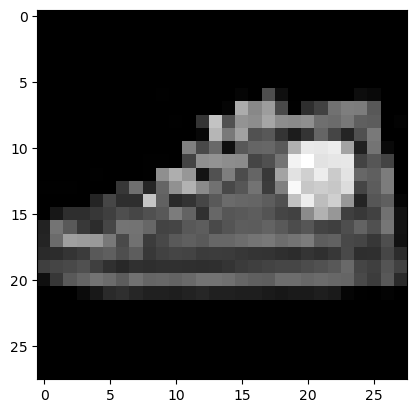

Label: 7


In [40]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

------------------------------------------------------------------------


Further Reading
===============

-   [torch.utils.data API](https://pytorch.org/docs/stable/data.html)
